# RED WINE CLASSIFICATION PROJECT

# I) DATA INSPECTION

1) IMPORT LIBRARIES USED AND THE RED-WINE DATASET

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [3]:
wine_df = pd.read_csv('C:\Kat\Tuyen\Project\Wine-classification\winequality-red.csv')

In [4]:
#Showing the dataframe
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2) SHAPE OF DATA AND GENERAL DESCRIPTIONS

In [5]:
wine_df.shape

(1599, 12)

In [6]:
#(1599,12) means dataset includes 1599 datapoints with 12 features (attributes)
#The last attribute ('quality') is the target column (supervised label)

In [7]:
#Data general statistical numbers
wine_stats=wine_df.describe().round(decimals=2)
wine_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


As we can see from the table, the number of attribute vectors, their mean, standard deviation, minimum/maximum, 1st-2nd-3rd quartiles

In [8]:
#Data Correlation matrix
cor_matrix=wine_df.corr().round(decimals=1)
cor_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0,-0.3,0.7,0.1,0.1,-0.2,-0.1,0.7,-0.7,0.2,-0.1,0.1
volatile acidity,-0.3,1.0,-0.6,0.0,0.1,-0.0,0.1,0.0,0.2,-0.3,-0.2,-0.4
citric acid,0.7,-0.6,1.0,0.1,0.2,-0.1,0.0,0.4,-0.5,0.3,0.1,0.2
residual sugar,0.1,0.0,0.1,1.0,0.1,0.2,0.2,0.4,-0.1,0.0,0.0,0.0
chlorides,0.1,0.1,0.2,0.1,1.0,0.0,0.0,0.2,-0.3,0.4,-0.2,-0.1
free sulfur dioxide,-0.2,-0.0,-0.1,0.2,0.0,1.0,0.7,-0.0,0.1,0.1,-0.1,-0.1
total sulfur dioxide,-0.1,0.1,0.0,0.2,0.0,0.7,1.0,0.1,-0.1,0.0,-0.2,-0.2
density,0.7,0.0,0.4,0.4,0.2,-0.0,0.1,1.0,-0.3,0.1,-0.5,-0.2
pH,-0.7,0.2,-0.5,-0.1,-0.3,0.1,-0.1,-0.3,1.0,-0.2,0.2,-0.1
sulphates,0.2,-0.3,0.3,0.0,0.4,0.1,0.0,0.1,-0.2,1.0,0.1,0.3


This matrix is a significant tool to get insights of the correlation between different fields. Values range from -1 to 1, the more the absolute value of them closer to one, the stronger the relationship becomes. Their sign illustrate types of relationship ('-' : negative relationship, '+' : positive relationship)

For instance, we take the correlation between quality and other attributes, it is evident to see that alcohol has the largest correlation (0.476) and positive relationship with quality. That means the higher the wine alcohol level is, the better it becomes

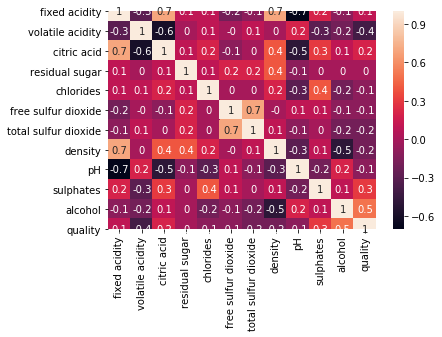

In [9]:
#We can visualize this correlation matrix
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

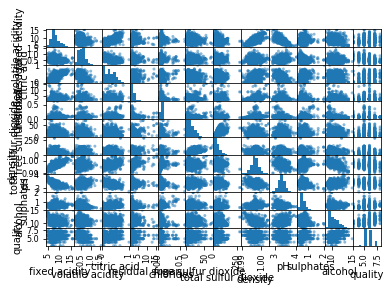

In [10]:
#Another visualization of how each of attribute affect others
from pandas.plotting import scatter_matrix
scatter_matrix(wine_df)
plt.show()

3) VISUALIZATION OF DATASET

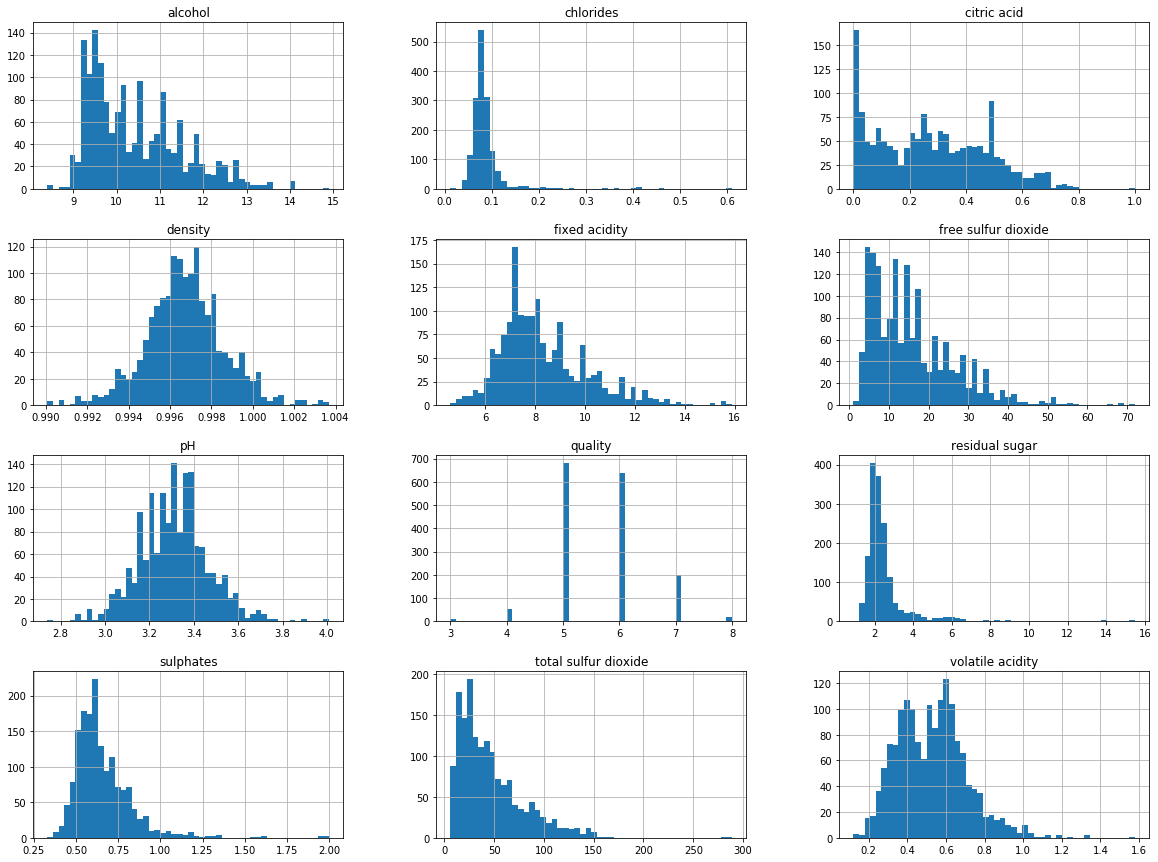

In [11]:
#Histogram of each attribute
import matplotlib.pyplot as plt
wine_df.hist(bins=50, figsize=(20, 15))
plt.show()

According to those histograms, we can see attributes: chlorides, density, residual sulphates and target column(quality) have a quite normal distribution

However, more importantly, the regconition of some attribute has null ('0') values, which is impossible in term of wine indexes and might affect the analysis in future, such as: Acid Citric. So we have to processed those data for better understanding

# II) DATA CLEANING AND TRANSFORMATION

1) DEALING WITH NULL VALUES

The technique I use here is replacing them with their median value

Our dealing target is Acid Citric

In [12]:
# Calculate the median value for Acid Citric
median_ac = wine_df['citric acid'].median()
# Substitute it in the Acid Citric column of the dataset where values are 0
wine_df['citric acid'] = wine_df['citric acid'].replace(
    to_replace=0, value=median_ac)

We check this acid citric graph again

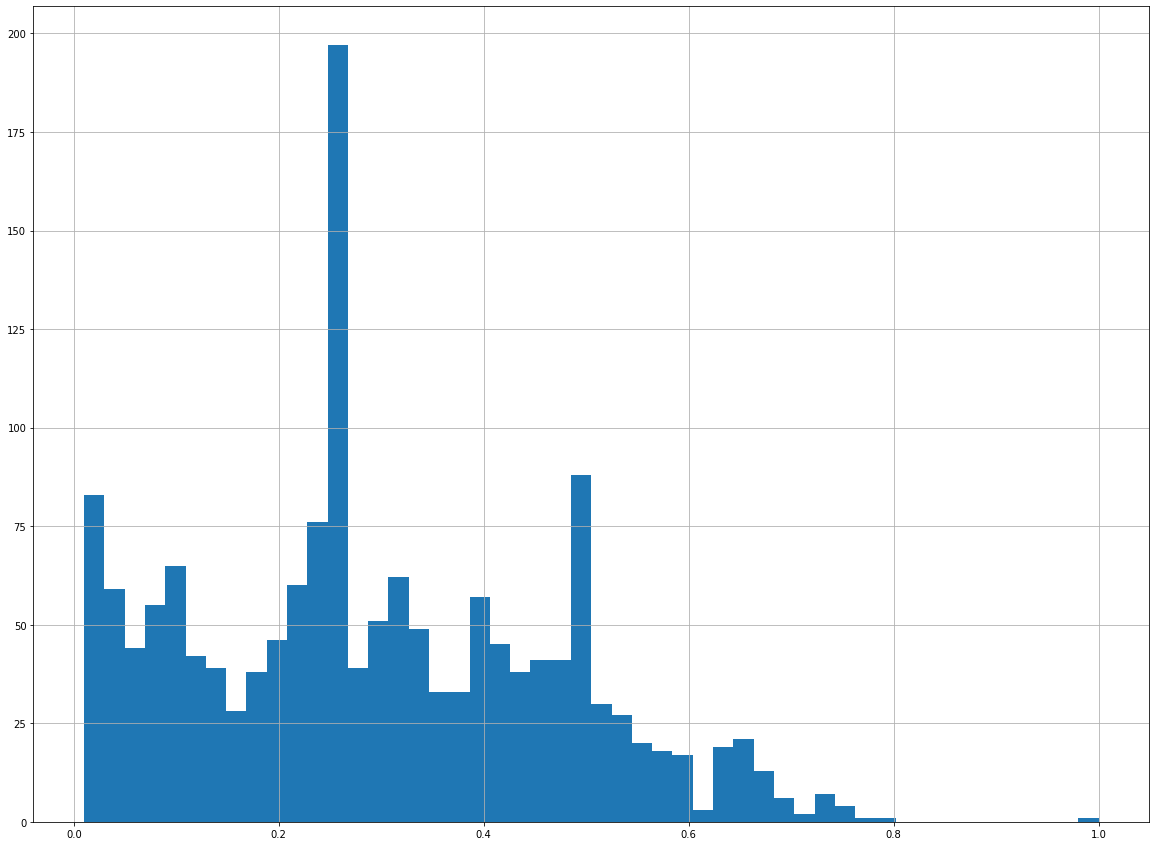

In [13]:
wine_df['citric acid'].hist(bins=50, figsize=(20, 15))
plt.show()

Here all the '0' have been replaced

2) DEALING WITH OUTLIERS

The technique I use here is removing them all from the dataset as they might have negative impact on my classification model

The below codes follow this logic:

a) For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation. 

b) It takes the absolute of Z-score because the direction does not matter, only if it is below the threshold. (here my target is extreme outliers - which are further more than 3 sd from mean value)

c) All(axis=1) ensures that for each row, all column satisfy the constraint. 

d) Change the dataframe based on the result

In [14]:
from scipy import stats
wine_df=wine_df[(np.abs(stats.zscore(wine_df)) < 3).all(axis=1)]

In [15]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.26,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.26,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.26,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


As the result, there are  148 datapoints that do not meet standards and are removed from the  dataset (9.3% reduction)

We have to reset index of new dataset for feature scaling

In [32]:
#Define index array
index=pd.Index([i for i in range(1451)])
#Reset index of new dataset
wine_df.index=index

In [33]:
#Check index again
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.26,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.26,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.26,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1446,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1447,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1448,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1449,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


3) FEATURE SCALING

Look back to the statistical description of dataframe

In [18]:
wine_stats=wine_df.describe().round(decimals=2)
wine_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00,1451.00
mean,8.31,0.52,0.29,2.39,0.08,15.10,43.74,1.00,3.32,0.64,10.42,5.66
std,1.65,0.17,0.17,0.86,0.02,9.31,29.44,0.00,0.14,0.13,1.02,0.78
min,5.00,0.12,0.01,1.20,0.04,1.00,6.00,0.99,2.88,0.33,8.50,4.00
25%,7.10,0.39,0.14,1.90,0.07,7.00,21.00,1.00,3.22,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,13.00,36.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.63,0.42,2.60,0.09,21.00,58.00,1.00,3.40,0.72,11.10,6.00
max,13.50,1.04,0.79,6.70,0.23,47.00,145.00,1.00,3.75,1.16,13.60,8.00


It's obvious that whereas some features have highly larger than '1.0' range as: fixed acidity(7.5), free sulfur dioxide(46)... others are just ranging from 0 to 1. This difference might affect classification depends on distance such as KNeighbor. Moreover, some learning algorithms don't work very well if the features have a different set of values. For this reason we need to apply a proper scaling system.

The scaling system I choose here is Standardization

In [19]:
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler(feature_range=(-1,1))
scaler.fit(wine_df.iloc[:,:11])
wine_scaled = scaler.transform(wine_df.iloc[:,:11])

In [20]:
#Scaled values become a 2D array
wine_scaled

array([[-0.43529412,  0.26086957, -0.35897436, ...,  0.44827586,
        -0.44578313, -0.64705882],
       [-0.34117647,  0.65217391, -0.35897436, ..., -0.26436782,
        -0.15662651, -0.49019608],
       [-0.34117647,  0.39130435, -0.92307692, ..., -0.12643678,
        -0.22891566, -0.49019608],
       ...,
       [-0.69411765, -0.15217391, -0.69230769, ...,  0.24137931,
         0.01204819, -0.01960784],
       [-0.78823529,  0.14130435, -0.71794872, ...,  0.5862069 ,
        -0.08433735, -0.33333333],
       [-0.76470588, -0.58695652,  0.17948718, ...,  0.17241379,
        -0.20481928, -0.01960784]])

In [21]:
#Return this 2D array back to dataframe, however the 'quality' column is removed
wine_scaled_df = pd.DataFrame(wine_scaled)

In [22]:
#Add the target column(quality)
wine_scaled_df['11']=wine_df['quality']

In [23]:
#Return the original names of these columns
wine_scaled_df.columns=wine_df.columns

In [24]:
#DataFrame showing
wine_scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.435294,0.260870,-0.358974,-0.745455,-0.595745,-0.565217,-0.597122,0.177570,0.448276,-0.445783,-0.647059,5
1,-0.341176,0.652174,-0.358974,-0.490909,-0.361702,0.043478,-0.122302,-0.009346,-0.264368,-0.156627,-0.490196,5
2,-0.341176,0.391304,-0.923077,-0.600000,-0.425532,-0.391304,-0.309353,0.028037,-0.126437,-0.228916,-0.490196,5
3,0.458824,-0.652174,0.410256,-0.745455,-0.606383,-0.304348,-0.223022,0.214953,-0.356322,-0.397590,-0.490196,6
4,-0.435294,0.260870,-0.358974,-0.745455,-0.595745,-0.565217,-0.597122,0.177570,0.448276,-0.445783,-0.647059,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1446,-0.717647,0.043478,-0.820513,-0.709091,-0.446809,0.347826,-0.453237,-0.364486,0.310345,-0.397590,-0.215686,5
1447,-0.788235,-0.065217,-0.769231,-0.636364,-0.744681,0.652174,-0.352518,-0.323364,0.471264,0.036145,0.058824,6
1448,-0.694118,-0.152174,-0.692308,-0.600000,-0.595745,0.217391,-0.510791,-0.207477,0.241379,0.012048,-0.019608,6
1449,-0.788235,0.141304,-0.717949,-0.709091,-0.606383,0.347826,-0.453237,-0.257944,0.586207,-0.084337,-0.333333,5


In [25]:
# The following code ensure there isnt any NaN value in quality caused by misindexing
wine_scaled_df.quality.isnull().any()

False

As we can see now all the attributes (except the target column) are successfully standardized (ranging from -1 to 1)

## Saving the data set

In [35]:
wine_scaled_df.to_excel('C:\Kat\Tuyen\Project\wine.xls', index = False)